# Assignment 3
## Due May 8th

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(42)

## Exercise 4

In [2]:
def get_data(n):
        
    x = np.random.uniform(0,2, n)
    X = np.expand_dims(x, axis=-1)
    y = 2 * np.sin(2*x) + 0.1*np.random.normal(0, 2, n)
    Y = np.expand_dims(y, axis=-1)
    
    return X, Y

In [3]:
X, Y = get_data(100)

### a) Plot


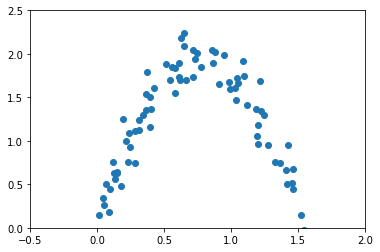

In [4]:
fig = plt.figure()
plt.scatter(X,Y)
plt.xlim([-0.5, 2])
plt.ylim([0, 2.5])
plt.show()

In [5]:
print(X.shape)
print(Y.shape)

(100, 1)
(100, 1)


### b)

In [6]:
def ridge_regression(X, Y, lam=1):
    #w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose(),X)+lam*np.identity(len(X))),X.transpose),Y)
    
    C = X.T.dot(X) + lam*np.eye(X.shape[1])
    w = np.linalg.inv(C).dot(X.T.dot(Y))
    # s. Formel fuer w auf https://simplyml.com/the-simplest-machine-learning-algorithm/
    return w


In [8]:
w = ridge_regression(X,Y)
w


array([[0.34777292]])

### c)

def ridge_pred(X,Y):
    lam = [0.1,1,10]
    pred = []
    for i in range(len(lam)):
        w = ridge_regression(X,Y,lam[i])
        pred.append(np.dot(X.transpose(),w)) # weil f(x) = X^T * Y
    return pred
    

[1.5145227156308494, 1.514532411510734, 1.5153744995110392]

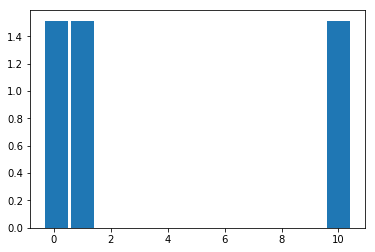

In [14]:
def ridge_pred(X,Y,lam):
    w = ridge_regression(X,Y,lam)
    return np.dot(X,w)
    
def mse(Y, Y_pred):
    return ((Y - Y_pred) ** 2).mean()
lams = [0.1, 1.0, 10.0]
mses = [mse(Y, ridge_pred(X,Y,lam)) for lam in lams]

plt.figure()
plt.bar(lams, mses)
mses

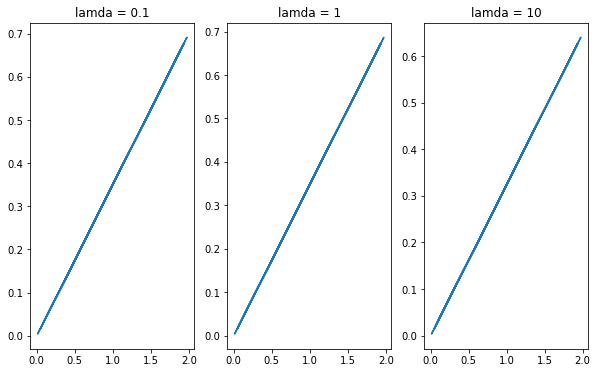

In [35]:
pred01 = ridge_pred(X,Y,0.1)
pred1 = ridge_pred(X,Y,1)
pred10 = ridge_pred(X,Y,10)

fig = plt.figure(figsize=(10,6))
plt.subplot(131)
plt.title("lamda = 0.1")
plt.plot(X,pred01)

plt.subplot(132)
plt.title("lamda = 1")
plt.plot(X,pred1)
plt.subplot(133)
plt.title("lamda = 10")
plt.plot(X,pred10)
plt.show()



### d)

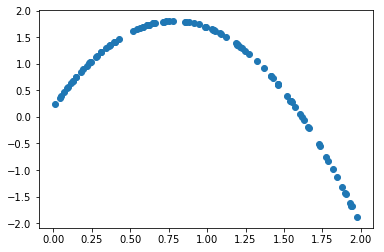

In [47]:
X_new = np.asarray([[1, x, x**2] for x in X])
lamdas = [0.001, 0.01, 0.1, 1, 10]

mses = [mse(ridge_pred(X_new,Y,lam), Y) for lam in lamdas]

plt.figure()
plt.scatter(X, ridge_pred(X_new, Y, lamdas[np.argmin(mses)]))
plt.show()

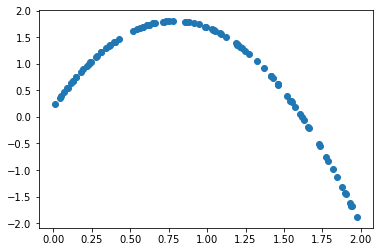

In [51]:
plt.figure()
plt.scatter(X, ridge_pred(X_new, Y, 0))
plt.show()


### e)

In [55]:
X_test, Y_test = get_data(20)
X_new_test = np.asarray([[1, x, x**2] for x in X_test])
def ridge_pred(X, w):
    return X.dot(w)



Linear interpolation

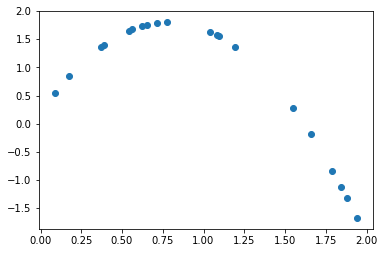

In [59]:
lin_res = ridge_pred(X_new_test, ridge_regression(X_new, Y, 0))
plt.figure()
plt.scatter(X_test, lin_res)

Ridge interpolation

In [68]:
ws = [ridge_regression(X_new, Y, lam) for lam in lams]
ws = np.squeeze(ws)
mses_ridge = [mse(ridge_pred(X_new_test,w), Y_test) for w in ws]
np.argmin(mses_ridge)

2

### f)

In [77]:
X = np.random.uniform(0,2, (100, 2))
Y = 2 * (X[:, 0]**2) + X[:, 1] + 1 + 0.1 * np.random.normal(0, 1, 100)
# Transform to new basis
X_new_b = np.asarray([[1, x[0], x[0]**2, x[1], x[1]**2, x[0]*x[1]] for x in X])

In [78]:
mses_new = [mse(Y, ridge_pred(X, ridge_regression(X,Y, lam))) for lam in lamdas]

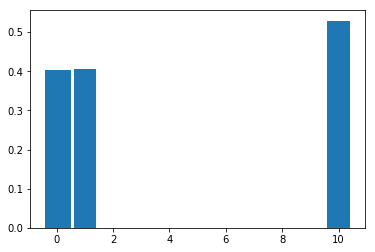

In [82]:
plt.figure()
plt.bar(lamdas, mses_new)
plt.show()